<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
# Проверим пропуски
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [ ]:
# Заполним пропуски
df["Profession"] = df["Profession"].fillna("Unknown")

In [ ]:
# преобразовать категориальные признаки в category
df["Gender"] = df["Gender"].astype("category")
df["Profession"] = df["Profession"].astype("category")

In [ ]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df["Spending Score (1-100)"]
X = df.drop("Spending Score (1-100)", axis=1)
print(y.head())
print("----------------------")
print(X.head())

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64
----------------------
   CustomerID  Gender  Age  Annual Income ($)     Profession  Work Experience  \
0           1    Male   19              15000     Healthcare                1   
1           2    Male   21              35000       Engineer                3   
2           3  Female   20              86000       Engineer                1   
3           4  Female   23              59000         Lawyer                0   
4           5  Female   31              38000  Entertainment                2   

   Family Size  
0            4  
1            3  
2            1  
3            2  
4            6  


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Анализ целевой переменной



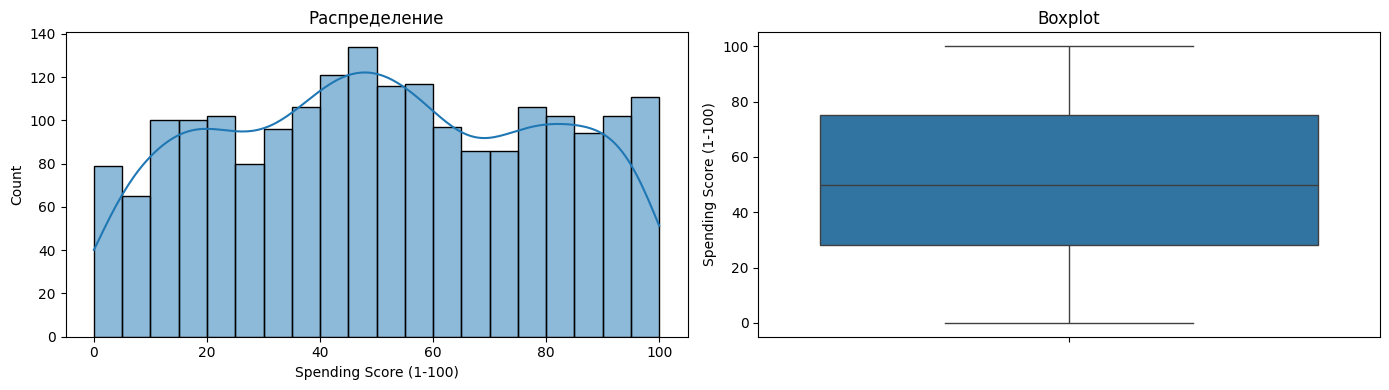

Минимум: 0
Максимум: 100
Среднее: 50.96
Медиана: 50.0
Стандартное отклонение: 27.93


In [ ]:
y = df["Spending Score (1-100)"]

print("Анализ целевой переменной")
print()

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, bins=20)
plt.title("Распределение")

plt.subplot(1, 2, 2)
sns.boxplot(y=y)
plt.title("Boxplot")

plt.tight_layout()
plt.show()

print(f"Минимум: {y.min()}")
print(f"Максимум: {y.max()}")
print(f"Среднее: {y.mean():.2f}")
print(f"Медиана: {y.median()}")
print(f"Стандартное отклонение: {y.std():.2f}")


Распределение равномерное, без ярко выраженных пиков, маленький пик около 50.
Диапазон значений от 1 до 100, среднее около 50, выбросов не наблюдается.

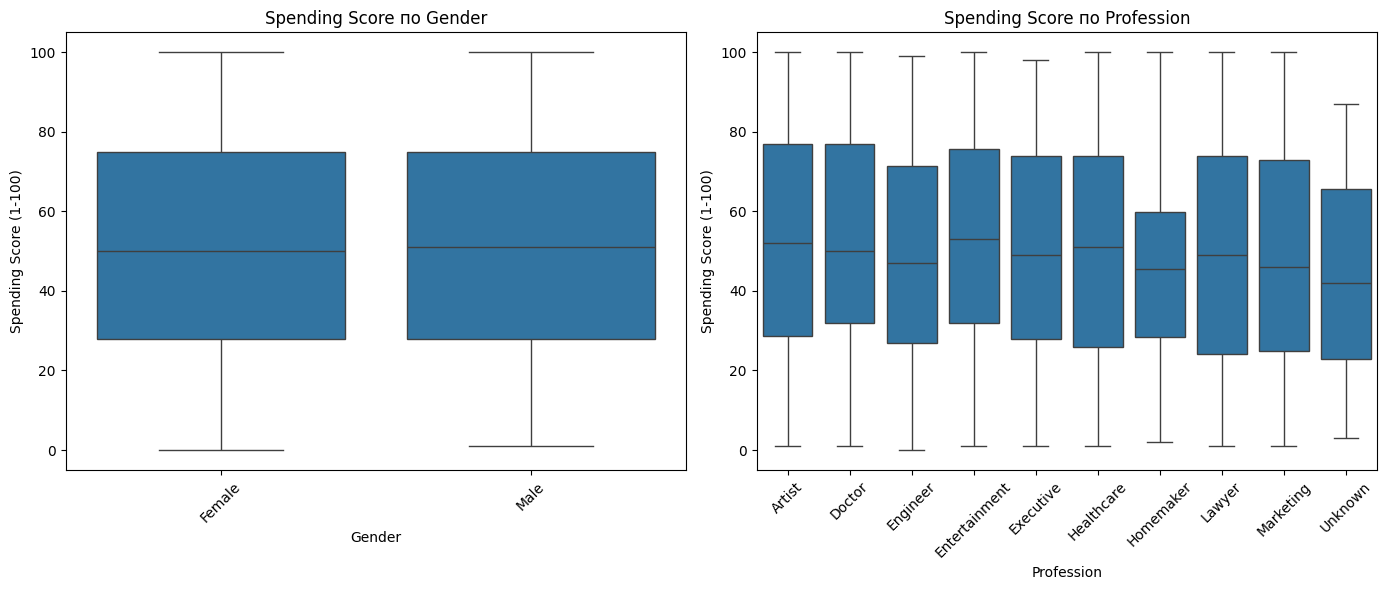


Средние Spending Score по Gender:
             mean        std  count
Gender                             
Female  50.974705  28.032580   1186
Male    50.944717  27.808573    814

Средние Spending Score по Profession:
                    mean        std  count
Profession                                
Artist         52.678105  28.404190    612
Doctor         51.900621  27.437703    161
Engineer       48.966480  27.733868    179
Entertainment  52.940171  26.455985    234
Executive      49.901961  28.102202    153
Healthcare     50.516224  28.344492    339
Homemaker      46.383333  28.394373     60
Lawyer         48.859155  27.718594    142
Marketing      48.717647  28.924208     85
Unknown        44.428571  24.924929     35


In [ ]:
categorial_features = ["Gender", "Profession"]
plt.figure(figsize=(14, 6))

for i, col in enumerate(categorial_features, 1):
    plt.subplot(1, len(categorial_features), i)
    sns.boxplot(data=df, x=col, y="Spending Score (1-100)")
    plt.title(f"Spending Score по {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Средние значения по категориям
for col in categorial_features:
    grouped = df.groupby(col, observed=True)["Spending Score (1-100)"].agg(["mean", "std", "count"])
    print(f"\nСредние Spending Score по {col}:")
    print(grouped)

Средний Spending Score не сильно зависит от пола,
но различается между некоторыми профессиями.
Это может указывать на влияние рода деятельности на уровень трат.

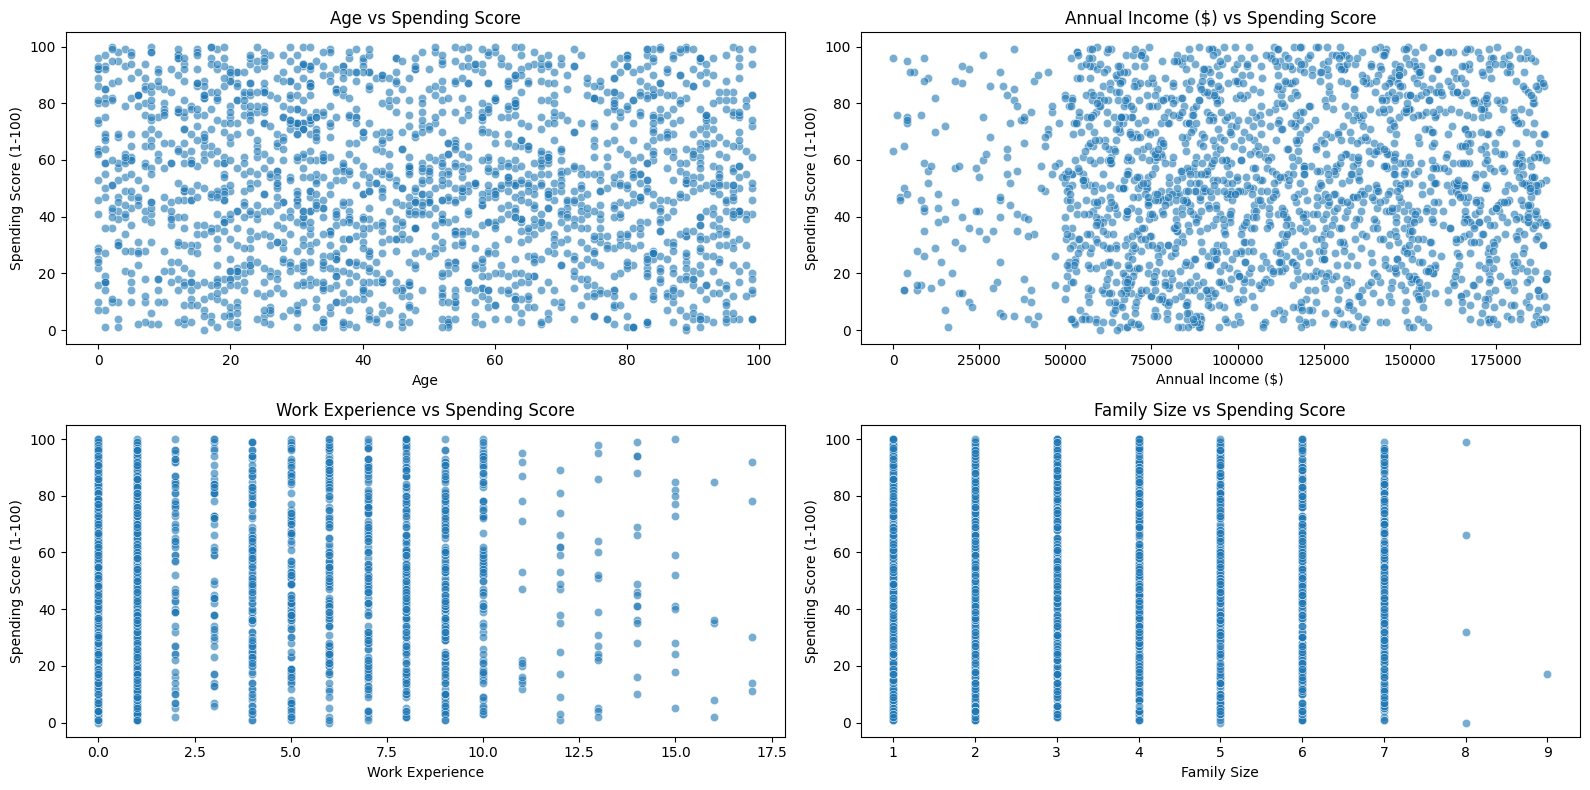

Корреляции числовых признаков с Spending Score:
Spending Score (1-100)    1.000000
Annual Income ($)         0.023299
Family Size               0.002232
Work Experience          -0.028948
Age                      -0.041798
Name: Spending Score (1-100), dtype: float64


In [ ]:
numeric_features = ["Age", "Annual Income ($)", "Work Experience", "Family Size"]

plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y="Spending Score (1-100)", alpha=0.6)
    plt.title(f"{col} vs Spending Score")
plt.tight_layout()
plt.show()

# Корреляции
corrs = df[numeric_features + ["Spending Score (1-100)"]].corr()["Spending Score (1-100)"].sort_values(ascending=False)
print("Корреляции числовых признаков с Spending Score:")
print(corrs)

best_features = categorial_features + numeric_features

Корреляции между Spending Score и числовыми признаками невысокие (<0.1),
что указывает на слабую линейную зависимость.
По графикам также видно, что Spending Score распределён почти равномерно
независимо от возраста и дохода.

In [ ]:
categorical_features = ["Gender", "Profession"]
numeric_features = ["Age", "Annual Income ($)", "Work Experience", "Family Size"]
best_features = categorical_features + numeric_features

print("Категориальные признаки:", categorical_features)
print("Числовые признаки:", numeric_features)
print("Все признаки для анализа:", best_features)


Категориальные признаки: ['Gender', 'Profession']
Числовые признаки: ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']
Все признаки для анализа: ['Gender', 'Profession', 'Age', 'Annual Income ($)', 'Work Experience', 'Family Size']


В процессе не было выявлено явно неинформативных или дублирующих переменных,
а также имеют логическое значение с точки зрения здравого смысла: возраст, доход, профессия и состав семьи действительно могут влиять на уровень расходов.
Поэтому исключать их на этапе предварительного анализа не было оснований,
и в best_features были включены практически все основные признаки, кроме технических идентификаторов (CustomerID).

Для дальнейшего моделирования выбраны категориальные признаки:

Gender, Profession

и числовые:

Age, Annual Income ($), Work Experience, Family Size.

Пропуски заполнены (Profession = 'Unknown').

Все признаки сохранены в переменной best_features для последующего этапа моделирования.

**Разведочный анализ показал, что данные чистые, пропусков немного.
Целевая переменная распределена равномерно.
Существенных линейных зависимостей с числовыми признаками не выявлено,
но есть небольшие различия по профессиям.
Для дальнейшего моделирования будут использоваться признаки из best_features.**

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[categorical_features])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат
encoded_cols = encoder.get_feature_names_out(categorical_features)

In [ ]:
X_encoded = pd.DataFrame(encoded, columns=encoded_cols, index=X.index)

In [ ]:
X = X.drop(['Gender', 'Profession'], axis=1)
X = pd.concat([X, X_encoded], axis=1)

In [ ]:
# Проверим на корректность
print(X.columns)
print(X.shape)
X.head()

Index(['CustomerID', 'Age', 'Annual Income ($)', 'Work Experience',
       'Family Size', 'Gender_Female', 'Gender_Male', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Profession_Unknown'],
      dtype='object')
(2000, 17)


,CustomerID,Age,Annual Income ($),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
0,1,19,15000,1,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,21,35000,3,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,20,86000,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,23,59000,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,31,38000,2,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = ["Age", "Annual Income ($)", "Work Experience", "Family Size"]
# создаём копию X, чтобы не потерять исходные данные
X_scaled = X.copy()

scaler = StandardScaler()
X_scaled[numeric_features] = scaler.fit_transform(X_scaled[numeric_features])

# Проверка результата
X_scaled.head()


,CustomerID,Age,Annual Income ($),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
0,1,-1.054089,-2.093501,-0.791207,0.117497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,-0.983723,-1.656133,-0.281162,-0.390051,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-1.018906,-0.540845,-0.791207,-1.405148,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,-0.913356,-1.131292,-1.046230,-0.897599,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,-0.631891,-1.590528,-0.536185,1.132594,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Модель

Модель 1
MAE:  23.61
MSE:  773.41
RMSE: 27.81
R²:   0.0084


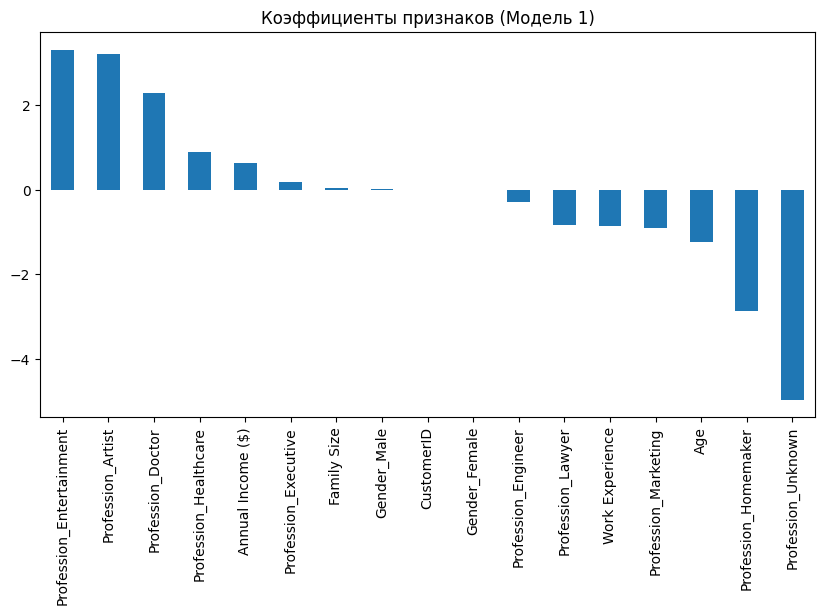

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model1 = LinearRegression()
# Обучаем
model1.fit(X_scaled, y)
# Предсказание y
y_pred1 = model1.predict(X_scaled)
# считаем метрики
mae = mean_absolute_error(y, y_pred1)
mse = mean_squared_error(y, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred1)

print("Модель 1")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# график коэффициентов
coefs = pd.Series(model1.coef_, index=X_scaled.columns)
coefs.sort_values(ascending=False).plot(kind="bar", figsize=(10,5), title="Коэффициенты признаков (Модель 1)")
plt.show()

**Интерпретация**

Модель обучалась и проверялась на одной и той же выборке, поэтому значение R² = 0.0084 близкий к нулю говорит о том, что линейная зависимость между признаками и Spending Score выражена слабо.

По графику коэффициентов видно, что признаки, связанные с профессиями, вносят наибольший вклад.

Числовые признаки оказывают умеренное или слабое влияние, что видно по небольшим значениям их коэффициентов.

Модель 2
Train: MAE=23.55, RMSE=27.77, R²=0.015
Test: MAE=23.85, RMSE=28.12, R²=-0.030


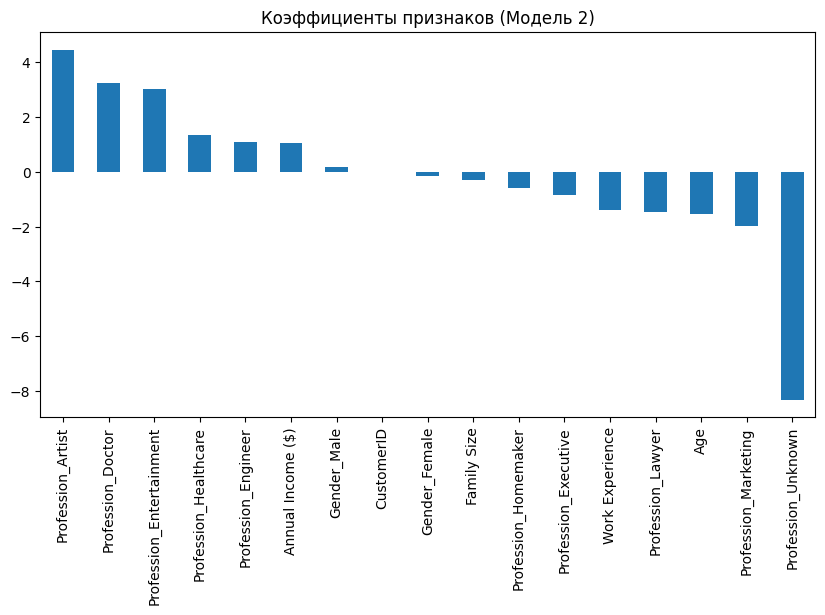

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

def print_metrics(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{label}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")

print("Модель 2")
print_metrics(y_train, y_train_pred, "Train")
print_metrics(y_test, y_test_pred, "Test")

coefs = pd.Series(model2.coef_, index=X_scaled.columns)
coefs.sort_values(ascending=False).plot(kind="bar", figsize=(10,5), title="Коэффициенты признаков (Модель 2)")
plt.show()

**Интерпретация**

После разделения данных на обучающую и тестовую выборки качество модели снизилось, что является нормальным поведением при проверке на новых данных.

Для обучающей выборки:

• MAE = 23.55 - средняя ошибка предсказания

• RMSE = 27.77 - среднее квадратичное отклонение ошибок

• R² = 0.015 - модель объясняет около 1,5 % вариации целевой переменной

Для тестовой выборки:

• MAE = 23.85, RMSE = 28.12, R² = -0.03 - отрицательное значение R² означает, что модель предсказывает чуть хуже, чем простое среднее значение Spending Score.

Разница между Train R² и Test R² невелика, значит, модель не переобучена, но линейная зависимость между признаками и целевой переменной выражена слабо.

Модель 3
MAE:  23.61
MSE:  773.58
RMSE: 27.81
R²:   0.0082


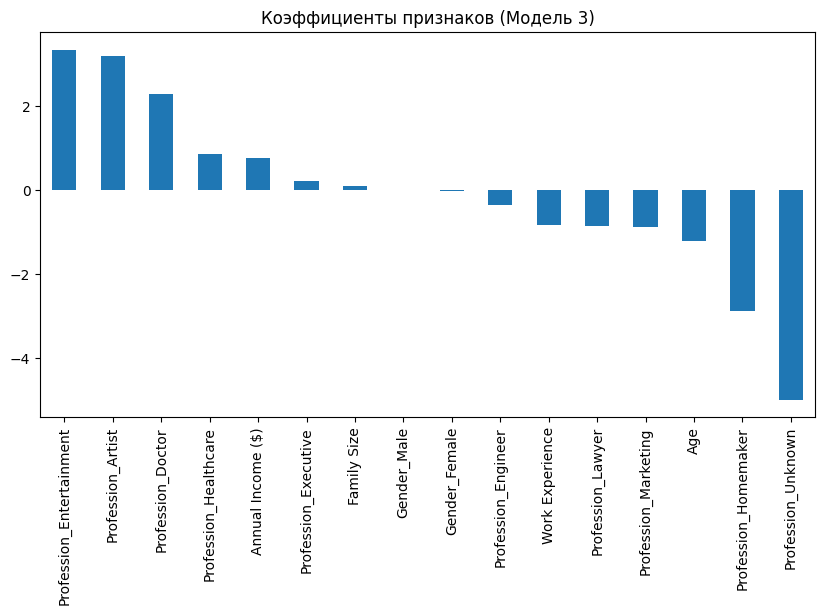

In [ ]:
X_best = df[best_features]
y = df["Spending Score (1-100)"]

# Кодируем категориальные признаки
encoder = OneHotEncoder(sparse_output=False)
X_best_cat = encoder.fit_transform(X_best[categorical_features])
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_best_cat = pd.DataFrame(X_best_cat, columns=encoded_cols, index=X_best.index)

# Объединяем с числовыми
X_best_num = X_best.drop(columns=categorical_features)
X_best_full = pd.concat([X_best_num, X_best_cat], axis=1)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_best_full[numeric_features] = scaler.fit_transform(X_best_full[numeric_features])

# Создаем и обучаем модель
model3 = LinearRegression()
model3.fit(X_best_full, y)

y_pred3 = model3.predict(X_best_full)

mae = mean_absolute_error(y, y_pred3)
mse = mean_squared_error(y, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred3)

print("Модель 3")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

coefs = pd.Series(model3.coef_, index=X_best_full.columns)
coefs.sort_values(ascending=False).plot(kind="bar", figsize=(10,5), title="Коэффициенты признаков (Модель 3)")
plt.show()

**Интерпретация**

Модель обучалась только на отобранных признаках.
Показатель детерминации R² = 0.0082 остаётся низким, что подтверждает слабую линейную зависимость между признаками и Spending Score.
При этом средняя абсолютная ошибка (MAE ≈ 23.6) и RMSE ≈ 27.8 соответствуют результатам предыдущих моделей,
что говорит о стабильности работы модели, несмотря на слабую объясняющую способность признаков.

По графику коэффициентов видно, что профессии Entertainment, Artist и Doctor положительно влияют на Spending Score,
тогда как Profession_Homemaker, Profession_Unknown и Age снижают его.
Числовые признаки оказывают минимальное влияние.

Модель 4
Train: MAE=23.55, RMSE=27.77, R²=0.015
Test: MAE=23.86, RMSE=28.12, R²=-0.031


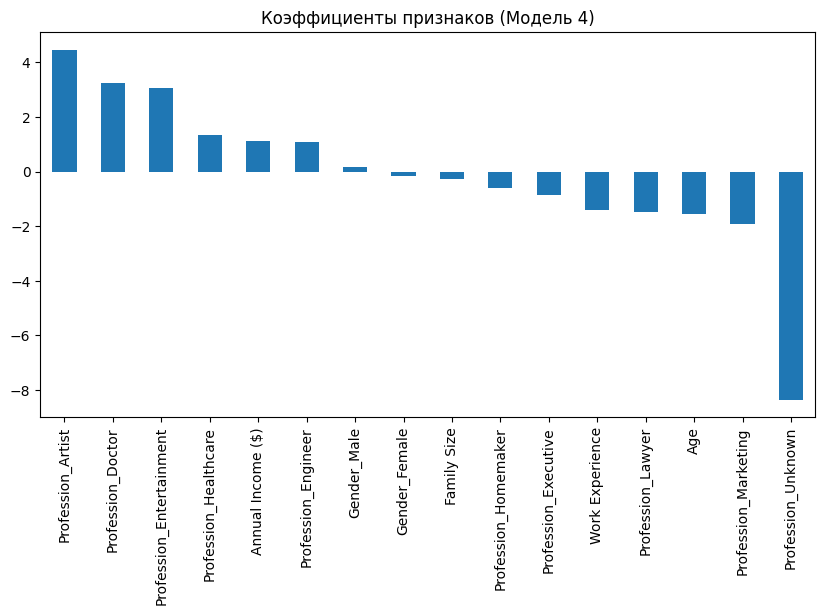

In [ ]:
categorical_features = ["Gender", "Profession"]
numeric_features = ["Age", "Annual Income ($)", "Work Experience", "Family Size"]
best_features = categorical_features + numeric_features

X_best = df[best_features]
y = df["Spending Score (1-100)"]

# Кодирование категориальных признаков
encoder = OneHotEncoder(sparse_output=False)
X_best_cat = encoder.fit_transform(X_best[categorical_features])
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_best_cat = pd.DataFrame(X_best_cat, columns=encoded_cols, index=X_best.index)

# Объединяем с числовыми признаками
X_best_num = X_best.drop(columns=categorical_features)
X_best_full = pd.concat([X_best_num, X_best_cat], axis=1)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_best_full[numeric_features] = scaler.fit_transform(X_best_full[numeric_features])

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X_best_full, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель
model4 = LinearRegression()
model4.fit(X_train, y_train)

y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

def metrics(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{label}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")

print("Модель 4")
metrics(y_train, y_train_pred, "Train")
metrics(y_test, y_test_pred, "Test")

coefs = pd.Series(model4.coef_, index=X_best_full.columns)
coefs.sort_values(ascending=False).plot(kind="bar", figsize=(10,5), title="Коэффициенты признаков (Модель 4)")
plt.show()

**Интерпретация**

В этой модели использовались только отобранные признаки (best_features), как и в Модели 3,
но теперь данные были разделены на обучающую и тестовую выборки (80 % / 20 %) с помощью train_test_split.

Низкие значения R² подтверждают, что линейная зависимость между признаками и Spending Score остаётся очень слабой.

По графику коэффициентов видно, что профессии Artist, Doctor, Entertainment и уровень дохода (Annual Income ($))
положительно влияют на Spending Score, тогда как Profession_Homemaker, Profession_Unknown, Age и Marketing
снижают значение целевой переменной.

**Выводы**

-- Между признаками и Spending Score нет выраженной линейной зависимости.

-- Линейная регрессия не подходит для точного прогнозирования этой целевой переменной на имеющемся наборе признаков.

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест